<a href="https://colab.research.google.com/github/Ashkabsha/TimeSeries/blob/main/lstm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import yfinance as yf
from keras.initializers import RandomNormal

In [2]:


stock_symbol = 'AAPL'
df = yf.download(stock_symbol,period="60mo",interval="1d")
print(df.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-09-20  55.060001  55.570000  54.787498  55.007500  52.682526  106435200
2018-09-21  55.195000  55.340000  54.322498  54.415001  52.115070  384986800
2018-09-24  54.205002  55.314999  54.157501  55.197498  52.864502  110773600
2018-09-25  54.937500  55.705002  54.924999  55.547501  53.199718   98217600
2018-09-26  55.250000  55.937500  54.939999  55.105000  52.775909   95938800


Importing Data

In [3]:
df.index = df.index.strftime('%Y-%m-%d')

In [4]:
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-20,55.060001,55.570000,54.787498,55.007500,52.682526,106435200
2018-09-21,55.195000,55.340000,54.322498,54.415001,52.115070,384986800
2018-09-24,54.205002,55.314999,54.157501,55.197498,52.864502,110773600
2018-09-25,54.937500,55.705002,54.924999,55.547501,53.199718,98217600
2018-09-26,55.250000,55.937500,54.939999,55.105000,52.775909,95938800
...,...,...,...,...,...,...
2023-09-13,176.509995,177.300003,173.979996,174.210007,174.210007,84267900
2023-09-14,174.000000,176.100006,173.580002,175.740005,175.740005,60895800
2023-09-15,176.479996,176.500000,173.820007,175.009995,175.009995,109205100


In [5]:
len(df)

1257

<Axes: xlabel='Date'>

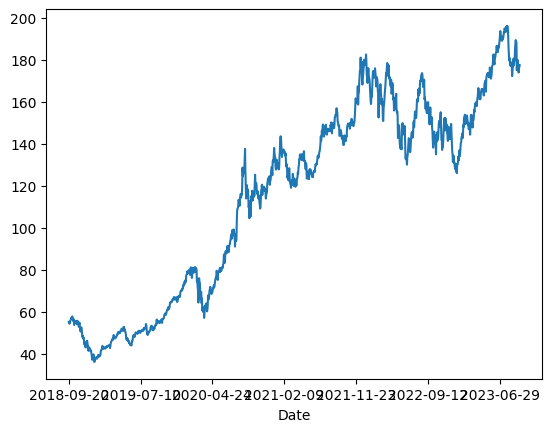

In [6]:
df['Open'].plot()

In [7]:
b_size=16
epoch=500
train_per=0.8
w_size=120
f_size=30

In [8]:
t_size=int(len(df)*train_per)

Train-Test Split

In [9]:
training = df.iloc[:t_size, 1:2].values
testing = df.iloc[t_size:, 1:2].values

Normalization

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)

Create target values

In [11]:
x_train = []
y_train = []
for iter in range(w_size, t_size):
    x_train.append(training_scaled[iter-w_size:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Defining Model

In [12]:
initializer = RandomNormal(mean=0.0, stddev=0.05)
algo = Sequential()
algo.add(LSTM(units = 60, return_sequences = True, input_shape = (x_train.shape[1], 1),kernel_initializer=initializer))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 60, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 60, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 60))
algo.add(Dropout(0.2))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(algo.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 60)           14880     
                                                                 
 dropout (Dropout)           (None, 120, 60)           0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 60)           29040     
                                                                 
 dropout_1 (Dropout)         (None, 120, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 120, 60)           29040     
                                                                 
 dropout_2 (Dropout)         (None, 120, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                2

Training Model

In [13]:
algo.fit(x_train, y_train, epochs = epoch, batch_size = b_size)

Epoch 1/500
56/56 [==============================] - 14s 20ms/step - loss: 0.0344
Epoch 2/500
56/56 [==============================] - 1s 19ms/step - loss: 0.0066
Epoch 3/500
56/56 [==============================] - 1s 20ms/step - loss: 0.0060
Epoch 4/500
56/56 [==============================] - 1s 20ms/step - loss: 0.0062
Epoch 5/500
56/56 [==============================] - 1s 19ms/step - loss: 0.0065
Epoch 6/500
56/56 [==============================] - 1s 20ms/step - loss: 0.0052
Epoch 7/500
56/56 [==============================] - 2s 29ms/step - loss: 0.0049
Epoch 8/500
56/56 [==============================] - 1s 22ms/step - loss: 0.0050
Epoch 9/500
56/56 [==============================] - 1s 19ms/step - loss: 0.0050
Epoch 10/500
56/56 [==============================] - 1s 19ms/step - loss: 0.0051
Epoch 11/500
56/56 [==============================] - 1s 19ms/step - loss: 0.0049
Epoch 12/500
56/56 [==============================] - 1s 19ms/step - loss: 0.0044
Epoch 13/500
56/56 [====

Dividing Test values into groups

In [14]:
data_train = df.iloc[:t_size, 1:2]
data_test = df.iloc[t_size:, 1:2]
data_total = df.iloc[:,1:2]
total_input = data_total[len(data_total) - len(data_test) - w_size:].values
total_input = total_input.reshape(-1, 1)
total_input = sc.transform(total_input)
x_test = []
y_test=[]

# Calculate the maximum number of sequences of length w_size that can be created
max_sequences = len(total_input) - w_size

# loop to create a 2D array of x_test
for iter in range(max_sequences):
    x_test.append(total_input[iter:iter+w_size, 0])
    y_test.append(total_input[iter+w_size, 0])     #new addition

x_test = np.array(x_test)

print(x_test.shape)  #  (max_sequences, w_size)


(252, 120)


Prediction

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_price = algo.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)


8/8 [==============================] - 1s 14ms/step


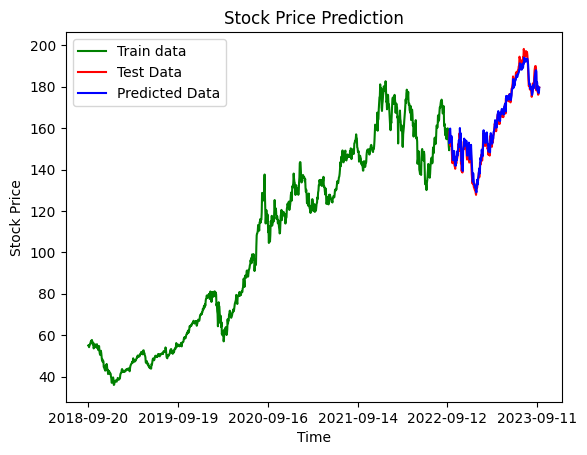

In [16]:
df.reset_index(inplace=True)
plt.plot(df.loc[:t_size+1,'Date'],df.loc[:t_size+1,'Open'], color='green',label="Train data")
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


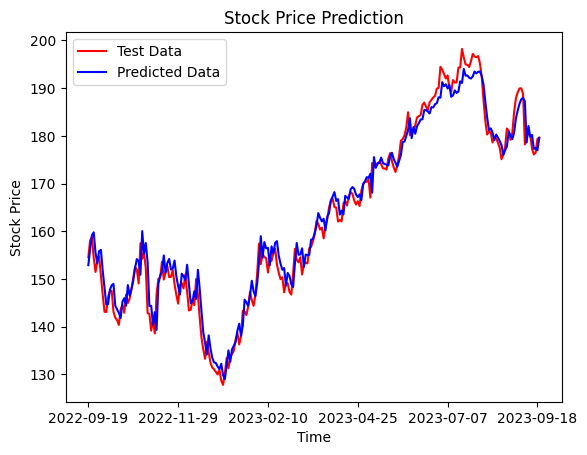

In [17]:
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(data_test.values,predicted_price)

mse = mean_squared_error(data_test.values, predicted_price)

rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 2.30
Mean Squared Error (MSE): 8.46
Root Mean Squared Error (RMSE): 2.91


Predict Future

In [19]:
test2=testing.copy()
for i in range(f_size):
  X=test2[-w_size:]
  X=X.reshape(w_size,1)
  X=sc.fit_transform(X)

  X=np.reshape(X,(1,w_size,1))

  close=algo.predict(X)
  y=sc.inverse_transform(close)

  test2=np.append(test2, y)


1/1 [==============================] - 0s 38ms/step


In [20]:
from datetime import datetime, timedelta
x=df.loc[-1:, 'Date']
day=x[len(x)-1]
date_obj = datetime.strptime(day, '%Y-%m-%d')
start_date = date_obj
date_list = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(f_size)]

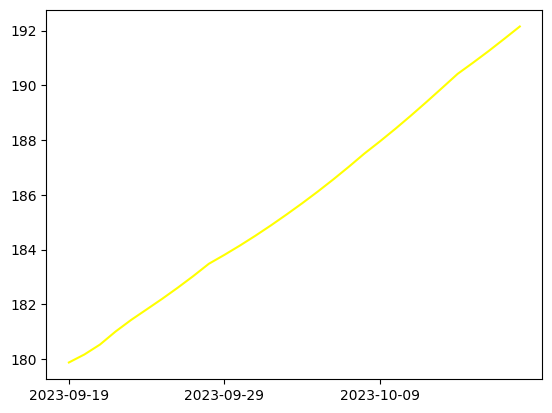

In [21]:
forcasted_data=test2[-f_size:]
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,len(forcasted_data),10))
plt.show()

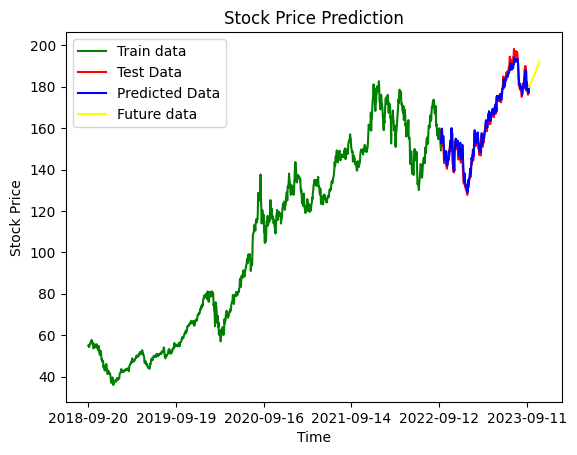

In [22]:

plt.plot(df.loc[:t_size,'Date'],df.loc[:t_size,'Open'], color='green',label="Train data")
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

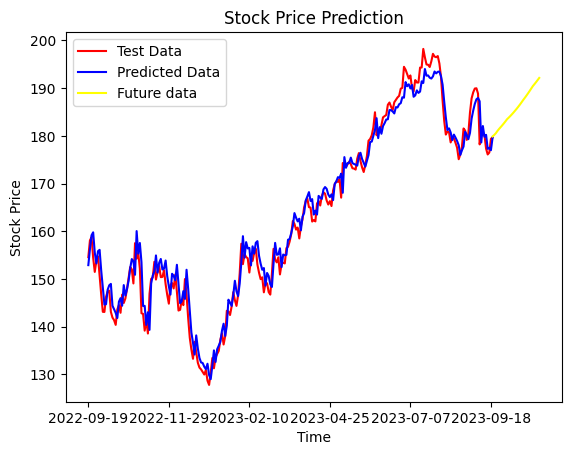

In [23]:
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [24]:
forcasted_data

array([179.87471008, 180.16790771, 180.52989197, 181.00445557,
       181.42771912, 181.81280518, 182.20018005, 182.60574341,
       183.03126526, 183.47953796, 183.80461121, 184.14630127,
       184.50665283, 184.88444519, 185.28022766, 185.68904114,
       186.11482239, 186.55937195, 187.02261353, 187.50370789,
       187.94891357, 188.41157532, 188.89411926, 189.39198303,
       189.90161133, 190.41648865, 190.82810974, 191.25250244,
       191.69647217, 192.14814758])

In [25]:
data_test.values[-30:]

array([[180.27000427],
       [180.92999268],
       [180.75      ],
       [178.61999512],
       [179.69000244],
       [179.47999573],
       [178.53999329],
       [177.50999451],
       [175.1000061 ],
       [176.13000488],
       [177.67999268],
       [181.55000305],
       [181.1000061 ],
       [179.1499939 ],
       [180.58999634],
       [184.8999939 ],
       [187.8500061 ],
       [189.11999512],
       [189.91999817],
       [189.97999573],
       [188.8500061 ],
       [178.21000671],
       [180.24000549],
       [180.30000305],
       [180.13000488],
       [177.30000305],
       [176.1000061 ],
       [176.5       ],
       [179.38000488],
       [179.63000488]])